# Essex Data Science Project Introduction

## <u>Objective</u>
Using the provided dataset, we want to understand who our 'most valuable tenants' are.

## <u>Initial Personal Thoughts</u>


Based on my experience with renting, my growing interest in owning a multifamily home, and the extensive research I've conducted on the subject, coupled with stories I've heard from multifamily property owners, I've found that the most valuable tenants typically exhibit most of the following behaviors.

1. **Longterm Tenant**
   + Provides a steady stream of income and reduces turnover costs associated with finding new renters.
   + Tenants with longer lease terms are beneficial for these reasons.


2. **Pays Market Rate or Greater** 
    + Rent close to or above market rate avoids lost opportunity costs, particularly in high occupancy markets where finding a tenant is easier.


3. **High Level of Care to the Property** 
    + Minimal wear and tear or damages help in reducing maintenance and repair expenses.
    + Allowing pets can potentially increase property damage.
    + Older tenants are often more mature and likely to maintain cleanliness and avoid causing damages.
    + A higher number of occupants than beds can increase the probability of more damages to the property.


4. **Rule Adherence** 
    + Tenants who respect property rules and guidelines help in reducing conflicts within a living complex and ensure a harmonious environment.
    + A low complaint rate is indicative of tenants who rarely cause disturbances or receive complaints from neighbors.
    

5. **Low Concession Utilization**
    + Concessions are incentives for renting but can negatively impact profitability.


6. **High Income to Rent Ratio**
    + Tenants with a higher income to rent ratio are more likely to consistently pay rent on time.
    + This ratio is a good proxy for assessing the likelihood of timely rent payments.


7. **High Property Safety Index Choice**
    + Preference for properties with high safety indexes suggests that tenants are likely to be stable and community-oriented.


# 
---

# Analysis

## <u>Summary of Analysis</u>


My primary objective was to identify the "most valuable tenants" to better understand and segment my renter population. Initially, I created a list of desired qualities that would define my ideal tenant. These characteristics included being a long-term tenant, paying market rate rent, showing a high level of care to the property, adhering to rules, utilizing low concessions, maintaining a high income to rent ratio, and choosing high safety properties.

Using the characteristics I had identified, I began sifting through the variables in the dataset. My goal was to either find existing variables that fulfilled these needs or to use the existing variables to create new ones that met these specific requirements.

To achieve my objective of identifying the 'most valuable tenants', I developed an index - a composite score designed to identify 'most valuable tenants' based on specific criteria that aligned with my definition of a valuable tenant. I formulated this index by aggregating the various tenant-related variables that I created, which I believed were indicative of a tenant's value. I constructed the index by penalizing qualities that didn't align with my values for a tenant and rewarding behaviors that I thought were valuable.

This index successfully identified 24,742 renters out of the 150,000 total in my dataset as 'most valuable tenants', which corresponded to approximately the top 85% percentile of my tenants based on their index scores. 

While I also experimented with a k-means clustering algorithm to find a distinct segment of my tenant population exhibiting behaviors aligned with my definition of a valuable tenant, this approach didn’t yield satisfactory results.

The index-based approach proved to be effective and robust enough to apply to both newer and older tenants.

## <u>Summary of Analysis</u>

1. Required Packages & Option Preferences
2. Loading the Dataset
3. Descriptive Statistics & Data Transformations
4. Identifying the 'Most Valuable Tenant' Population
5. Builiding A Prediction Model

## 1. Required Packages & Option Preferences

### 1.1 Required Packages

In [192]:
import pandas as pd 
import numpy as np
from datetime import datetime # for date and time transformations
import matplotlib.pyplot as plt # for visualization 
import seaborn as sns # for visualization
from sklearn.cluster import KMeans # for kmeans clustering
from sklearn.preprocessing import StandardScaler # for kmeans clustering
from sklearn.metrics import silhouette_score # for kmeans clustering
from scipy.stats import ttest_ind # for t-test
from sklearn.model_selection import train_test_split # for logistic regression prediction model
from sklearn.linear_model import LogisticRegression # for logistic regression prediction model
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, roc_auc_score # for logistic regression prediction model

### 1.2 Option Preferences

In [2]:
# Set option to display all columns
pd.set_option('display.max_columns', None)

# Changing display format to suppress scientific notation
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set the maximum number of rows to display
pd.set_option('display.max_rows', 100)

## 2. Loading the Dataset

### 2.1 Loading the data

In [4]:
# Loading the master dataset 
data = pd.read_csv('Essex_Data Science_Dataset.csv')
data.head()

,TenantId,PropertyId,UnitId,MoveInDate,MoveOutDate,amenity_amount,LeaseTerm,Rent,Concession,SqFt,Beds,County,Region,year_built,closest_transit_stop_dist_mi,lead_source,Zip_from,Zip_to,City_from,City_to,State_from,State_to,sub_occupancy,sub_pct_concessions_offer,sub_asking_rent,sub_concession_asking_pct,pet,INDUSTRY,yearly_adjusted_income,primary_age_at_move_in,total_of_occupants,pct_unemployment,property_safety_index,median_home_price
0,-,45,"2,951",4/22/21,6/15/21,335,12.000,2134.000,0,725,1,Santa Clara,Northern California,1974.000,2.252,Google,95129.000,95051.000,SAN JOSE,SANTA CLARA,CA,CA,0.978,0.184,2087.020,0.056,0,"Professional, Scientific, and Technical Services",76799.000,24.000,1.000,5.400,22.000,1407986.000
1,1,"5,078","52,705",4/19/22,NaN,0,12.000,2997.000,1,745,1,San Mateo,Northern California,1987.000,2.946,NaN,94404.000,94404.000,SAN MATEO,SAN MATEO,CA,CA,0.982,0.002,1784.700,0.081,1,Information,84220.000,37.000,1.000,2.200,59.000,1753663.000
2,2,32,"23,651",11/3/22,5/5/23,205,6.000,2187.000,0,442,0,Orange,Southern California,1984.000,8.644,NaN,92663.000,92648.000,NEWPORT BEACH,HUNTINGTON BEACH,CA,CA,0.972,0.150,3290.310,0.056,0,Manufacturing,91203.000,68.000,1.000,3.000,46.000,1420344.000
3,3,"8,606","80,077",11/30/21,11/29/22,505,12.000,2527.000,208,825,1,NaN,NaN,NaN,NaN,Property Website,98102.000,98109.000,SEATTLE,SEATTLE,WA,WA,NaN,NaN,NaN,NaN,0,Finance and Insurance,180426.000,25.000,1.000,NaN,NaN,NaN
4,4,"5,620","75,013",5/31/19,7/12/20,564,NaN,NaN,0,904,1,Alameda,Northern California,2008.000,5.585,NaN,94544.000,94588.000,HAYWARD,PLEASANTON,CA,CA,0.950,0.432,2870.000,0.025,0,"Professional, Scientific, and Technical Services",NaN,NaN,NaN,2.600,71.000,1048554.000


## 3. Descriptive Statistics & Data Trasformation

### **<u>Summary of Section 3</u>**


I worked with 15 key variables in my dataset: MoveInDate, MoveOutDate, Rent, sub_asking_rent, County, SqFt, Beds, pet, primary_age_at_move_in, total_of_occupants, Concession, yearly_adjusted_income, INDUSTRY, and property_safety_index. These were crucial for my analysis.

Despite the potential for more extensive transformations and the creation of additional variables for a deeper analysis of my renters, time constraints have constrained my exploration. Nonetheless, the variables I've established are expected to be quite insightful. These include:

1. **tenure**: Reflecting the length of a tenant's stay.
2. **resident_status**: Distinguishing whether a tenant is current or a past renter.
3. **long_term_tenant**: Indicating tenants with extended lease periods.
4. **rent_market_comparison**: Comparing a tenant's rent payments to the market rate in their area.
5. **care_proxy_score**: A score designed to assess how well a tenant is likely to take care of the property.
6. **meaningful_concession_received**: Identifying whether a tenant has received significant rental concessions.
7. **income_rent_category**: The ratio of a tenant's income to their rent.
8. **property_safety_index**: Evaluating the safety levels of the properties selected by tenants.

The newly created variables will be instrumental in the next phase of identifying the 'most valuable tenants' population.

I recognize a significant opportunity to enhance the understanding of tenants by incorporating additional data sources, which would provide clearer insights than the approximate proxies I've been using.

If possible, stakeholders should consider incorporating additional variables that could further clarify my understanding of tenants. These might include the number of maintenance requests a tenant has made, the total cost incurred by a company due to a tenant's repairs or maintenance, the number of warnings a tenant has received from management, details on the timeliness and consistency of rent payments, credit scores, and the count of any infractions. Such data could significantly enhance my profiling of tenants and provide a more detailed picture.

### **<u>Start of Section 3</u>**

Before diving into problem-solving, I'm planning to take a thorough look at the data. It's important to explore each relevant column to uncover any interesting insights or patterns. By understanding the nuances of the dataset, I can then brainstorm the most effective strategies for tackling the problem.

I plan to begin by focusing on each characteristic that defines a valuable tenant, as previously outlined. For each of these traits, I'll identify the corresponding columns in our dataset that are relevant. Alongside this, I'll also be handling any necessary data clean-up and making the required data transformations to align with these specific aspects.

### 3.1 Longterm Tenants

#### <u>Variables Used</u>: MoveInDate, MoveOutDate

The MoveInDate and MoveOutDate columns are key for distinguishing between past and current renters. Additionally, these dates can be used to calculate each individual's total tenure. Once we have the tenure data, we can analyze its distribution and statistics to identify who is considered as a long-term renter.

In [5]:
# Checking on the data types of the columns
data[['MoveInDate', 'MoveOutDate']].dtypes

MoveInDate     object
MoveOutDate    object
dtype: object

In [86]:
# Convert MoveInDate and MoveOutDate to datetime to allow for data transformation
data['MoveInDate'] = pd.to_datetime(data['MoveInDate'])
data['MoveOutDate'] = pd.to_datetime(data['MoveOutDate'], errors='coerce')  # handles empty values
data[['MoveInDate', 'MoveOutDate']].dtypes
print(max(data['MoveInDate']))

2023-09-30 00:00:00


In [7]:
# Understanding null values in our columns
print(f"Number of missing values in 'MoveInDate' is {data['MoveInDate'].isna().sum()}")
print(f"Number of missing values in 'MoveOutDate' is {data['MoveOutDate'].isna().sum()}")

Number of missing values in 'MoveInDate' is 0
Number of missing values in 'MoveOutDate' is 40230


In [8]:
# Use today's date for missing MoveOutDate to create a tenure (in days) column
today = pd.to_datetime(datetime.today().strftime('%Y-%m-%d'))
data['tenure'] = data.apply(lambda row: ((row['MoveOutDate'] if pd.notnull(row['MoveOutDate']) else today) - row['MoveInDate']).days, axis=1)

In [9]:
# Creating a resident_status column indicating whether a tenant is a past or current tenant
# Residents with no MoveOutDate are considered current tenants
# Residents with a MoveOutDate are considered past tenants
data['resident_status'] = data['MoveOutDate'].apply(lambda x: 'Past' if pd.notnull(x) else 'Current')
data['resident_status'].value_counts()

Past       109770
Current     40230
Name: resident_status, dtype: int64

In [10]:
# Checking on the validity of the new columns
data[['MoveInDate', 'MoveOutDate', 'tenure', 'resident_status']].head()

,MoveInDate,MoveOutDate,tenure,resident_status
0,2021-04-22,2021-06-15,54,Past
1,2022-04-19,NaT,595,Current
2,2022-11-03,2023-05-05,183,Past
3,2021-11-30,2022-11-29,364,Past
4,2019-05-31,2020-07-12,408,Past


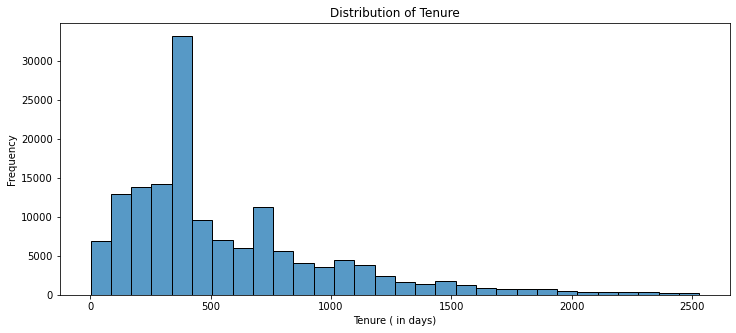

count   150000.000
mean       560.230
std        434.277
min          1.000
10%        138.000
25%        280.000
50%        395.000
75%        737.000
85%        998.000
90%       1144.000
max       2529.000
Name: tenure, dtype: float64


In [11]:
# Visualizing the distribution of tenure to understand what constitutes a long-term renter 
plt.figure(figsize=(12, 5))
sns.histplot(data['tenure'], kde=False, bins=30)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure ( in days)')
plt.ylabel('Frequency')
plt.show()

print(data['tenure'].describe(percentiles=[.1, .25, .5, .75, .85, .9]))

From the histogram and the statistics, seems like a long-term tenant could be classified
as someone who has been renting for more than 736 days (if we use the 75% percentile as
a cutoff). Since the number 736 is very close to the number of days in a two year period
(365*2=730), then it might be a good idea to classify long-term tenants as tenants who
have been renting for more than two years.

In [12]:
# Creating a binary variable identifying longterm tenants using 2 years as a threshold value
data['long_term_tenant'] = data['tenure'].apply(lambda x: 1 if x >= 730 else 0)

In [13]:
# Checking the validity of the new column 'long_term_tenant'
data[['MoveInDate', 'MoveOutDate', 'tenure', 'resident_status', 'long_term_tenant']].head(10)

,MoveInDate,MoveOutDate,tenure,resident_status,long_term_tenant
0,2021-04-22,2021-06-15,54,Past,0
1,2022-04-19,NaT,595,Current,0
2,2022-11-03,2023-05-05,183,Past,0
3,2021-11-30,2022-11-29,364,Past,0
4,2019-05-31,2020-07-12,408,Past,0
5,2017-05-05,2017-09-04,122,Past,0
6,2021-03-30,NaT,980,Current,1
7,2023-08-12,NaT,115,Current,0
8,2018-10-16,2022-08-15,1399,Past,1
9,2019-05-25,2021-10-05,864,Past,1


I've identified two types of renters in my dataset: those who have previously rented and moved out (Past tenants), and those who are currently renting (Current tenants). The criteria for long-term renters differ between these groups.

For past renters, I determine who qualifies as a long-term renter by analyzing their tenure length. This involves examining the distribution and statistics of their tenures and establishing a threshold that classifies them as long-term, based on a logical cut-off point I've determined.

In the case of current renters, if they've already stayed as long as my defined threshold for long-term tenancy, they are categorized as long-term renters. However, for those who haven't yet reached this duration, I'm interested in predicting which ones might eventually become long-term renters.

Creating a predictive model to determine which current renters are likely to become long-term renters would be incredibly useful. This model would use data from past renters as a foundation. I believe that being a long-term renter is a significant indicator of a 'valuable tenant', which is why I'm focused on ensuring that this variable is as accurate and robust as possible.

Given more time, I would develop this predictive model for current renters who haven't yet reached the long-term mark, to identify potential long-term renters in the future. For the moment, I am proceeding with the definition of long-term renter that I have already established.

### 3.2 Pays Market Rate or Greater

Tenants who are paying rent at or above the market rate are beneficial for the company's revenue. On the other hand, those paying significantly below the market rate represent a potential opportunity to either increase rents to a more market-reflective rate or find new tenants who are willing to pay closer to what the market demands.

#### <u>Variables Used</u>: Rent, sub_asking_rent, County, SqFt, Beds

In [14]:
data['Rent'].dtype

dtype('float64')

In [15]:
# Understanding nulls for the column
print(f"Number of missing values in 'Rent' is {data['Rent'].isna().sum()}")

Number of missing values in 'Rent' is 1851


I'm thinking that rent prices probably vary a lot depending on the area. What's considered a high rent in one market might actually be low in another. I want to check out the average rents in each County to see how they differ. Plus, I'm curious about the rent price per square foot in each County to get a better understanding of the value.

In [16]:
# Looking at average Rent prices for each County
grouped_data = data.groupby('County')['Rent'].agg(
    Count='count',
    Average='mean',
    Percentile_75=lambda x: x.quantile(0.75),
    Percentile_90=lambda x: x.quantile(0.90)
)

# Sort the DataFrame by 'Average' in descending order
grouped_data_sorted = grouped_data.sort_values(by='Average', ascending=False)
grouped_data_sorted

,Count,Average,Percentile_75,Percentile_90
County,,,,
San Francisco,2101,3177.843,3795.000,4374.000
Marin,445,3119.726,3434.000,3761.600
San Mateo,4641,2956.689,3276.000,3727.000
Santa Clara,21218,2801.809,3089.000,3445.000
Los Angeles,21986,2571.523,2911.000,3340.500
Alameda,10860,2568.338,2822.250,3198.000
Contra Costa,6007,2534.483,2756.000,3150.000
Orange,12323,2382.713,2613.000,3307.400
San Diego,11353,2139.576,2430.000,2843.000


In [17]:
# Looking at rent prices per SqFt for each County
# Create a new column for Rent per SqFt
data['Rent_per_SqFt'] = data['Rent'] / data['SqFt']

# Group by 'County' and aggregate the Rent_per_SqFt
grouped_data = data.groupby('County')['Rent_per_SqFt'].agg(
    Count='count',
    Average='mean',
    Percentile_75=lambda x: x.quantile(0.75),
    Percentile_90=lambda x: x.quantile(0.90)
)

# Sort the DataFrame by 'Average' in descending order
grouped_data_sorted = grouped_data.sort_values(by='Average', ascending=False)
grouped_data_sorted

,Count,Average,Percentile_75,Percentile_90
County,,,,
San Francisco,2101,4.495,5.020,5.642
San Mateo,4641,3.579,3.945,4.350
Santa Clara,21218,3.220,3.531,3.931
Marin,445,3.203,3.431,3.655
Los Angeles,21986,3.097,3.461,3.873
Alameda,10860,3.090,3.361,3.841
Contra Costa,6007,2.838,3.128,3.529
Orange,12323,2.686,2.998,3.460
San Diego,11353,2.608,2.940,3.639


The ordering is slightly different from when I looked at Rent per County

I'm planning to create a variable that shows how a renter's payments compare to the market rate for similar properties. Fortunately, our dataset already includes a 'sub_asking_rent' column, which provides this market rate information. I plan to utilize this to determine if renters are paying rent that is equal to, higher than, or lower than the prevailing market rates.

**_However, it's important to note that this all hinges on the assumption that 'sub_asking_rent' accurately reflects factors like location, square footage, and bedroom count._**

In [18]:
# average price of sub_asking_rent for each county
grouped_data = data.groupby('County')['sub_asking_rent'].agg(
    Count='count',
    Average='mean',
    Percentile_75=lambda x: x.quantile(0.75),
    Percentile_90=lambda x: x.quantile(0.90)
)

# Sort the DataFrame by 'Average' in descending order
grouped_data_sorted = grouped_data.sort_values(by='Average', ascending=False)
grouped_data_sorted

,Count,Average,Percentile_75,Percentile_90
County,,,,
Alameda,10827,2855.030,3355.150,3685.022
Los Angeles,21901,2645.722,3098.910,3615.440
Marin,448,2540.863,2509.745,3070.875
Orange,12295,2471.506,2689.530,3110.474
Santa Clara,21194,2360.186,2710.220,3030.730
Snohomish,3178,2298.212,2493.658,2696.892
San Diego,11320,2248.001,2570.717,3151.414
San Francisco,2094,2233.163,2377.530,2527.705
Ventura,4959,2231.490,2542.435,2703.024


It is worth noting that the ordering here looks much different than the previous two tables. I will continue with creating the variable analyzing rent compared to market for each tenant while keeping this in mind.

In [19]:
# Creating a column conveying how much a renter is paying compared to average rent in the area
data['rent_compared_to_submarket'] = ((data['Rent'] - data['sub_asking_rent']) / data['sub_asking_rent']) * 100

# Display the new column
data[['Rent', 'sub_asking_rent', 'rent_compared_to_submarket']].head()

,Rent,sub_asking_rent,rent_compared_to_submarket
0,2134.000,2087.020,2.251
1,2997.000,1784.700,67.927
2,2187.000,3290.310,-33.532
3,2527.000,NaN,NaN
4,NaN,2870.000,NaN


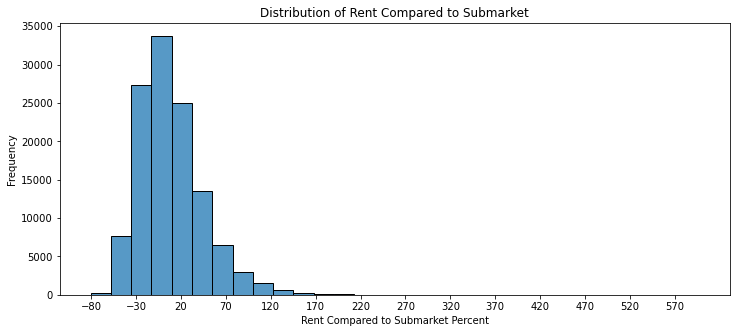

count   119479.000
mean         8.630
std         35.744
min        -80.660
10%        -31.225
25%        -16.614
50%          3.237
75%         27.228
85%         43.488
90%         54.962
max        597.079
Name: rent_compared_to_submarket, dtype: float64


In [20]:
# Visualizing the newly created variable, Rent_Deal_Percent
min_value = data['rent_compared_to_submarket'].min()
max_value = data['rent_compared_to_submarket'].max()

plt.figure(figsize=(12, 5))
sns.histplot(data['rent_compared_to_submarket'], kde=False, bins=30)
plt.title('Distribution of Rent Compared to Submarket')
plt.xlabel('Rent Compared to Submarket Percent')
plt.ylabel('Frequency')
plt.xticks(range(int(min_value), int(max_value) + 1, 50))  # Setting ticks at 25% increments
plt.show()
print(data['rent_compared_to_submarket'].describe(percentiles=[.1, .25, .5, .75, .85, .9]))

The distribution seems normal, which aligns with my expectations. However, what puzzles me are the actual values of the Real Deal Percent. Is it accurate that 25% of tenants are paying 27% more than the average rent for similar properties in their area? Could they be living in exceptionally luxurious apartments? And do such properties even exist within the portfolio?

The numbers in general just seem a bit too large.

This is where having domain knowledge or someone familiar with the data would be immensely helpful. I would ask 'Is sub_asking_rent' a variable that I can trust?

Since these values don't make sense to me, I will create a variable to calculate the average rent for a property, taking into account the County, square footage, and number of bedrooms available. I will then repeat this whole process again and see whether the numbers make more sense.

To start off, I'm planning to transform the 'SqFt' from a continuous numeric variable into a categorical one. For the sake of simplicity and due to time constraints, I'll categorize 'SqFt' into quartiles. While I understand this might not be the perfect approach, it's a practical solution for now.

In [21]:
#Creating SqFt category from SqFt
data['SqFt_Category'] = pd.qcut(data['SqFt'], 4, labels=['1', '2', '3', '4'])

# Beds as a categorical variable
data['Beds_cat']=data['Beds'].astype(str)

# Creating the average rent in an area taking into account County, SqFt, and Beds
avg_rent = data.groupby(['County', 'SqFt_Category', 'Beds_cat'])['Rent'].mean().reset_index(name='sub_asking_rent_derived')

# Merge the average rent back into the original DataFrame
data = data.merge(avg_rent, how='left', on=['County', 'SqFt_Category', 'Beds_cat'])

# Checking validity of the variable
data[['Rent', 'County', 'SqFt', 'SqFt_Category', 'Beds', 'Beds_cat', 'sub_asking_rent_derived']].head()

,Rent,County,SqFt,SqFt_Category,Beds,Beds_cat,sub_asking_rent_derived
0,2134.000,Santa Clara,725,2,1,1,2548.821
1,2997.000,San Mateo,745,2,1,1,2845.547
2,2187.000,Orange,442,1,0,0,1876.983
3,2527.000,NaN,825,3,1,1,NaN
4,NaN,Alameda,904,3,1,1,2738.896


In [22]:
# Creating a column conveying how much a renter is paying compared to average rent in the area
data['rent_compared_to_submarket_updated'] = ((data['Rent'] - data['sub_asking_rent_derived']) / data['sub_asking_rent_derived']) * 100

# Display the new column
data[['Rent', 'County', 'SqFt', 'SqFt_Category', 'Beds', 'Beds_cat', 'sub_asking_rent_derived','rent_compared_to_submarket_updated']].head()

,Rent,County,SqFt,SqFt_Category,Beds,Beds_cat,sub_asking_rent_derived,rent_compared_to_submarket_updated
0,2134.000,Santa Clara,725,2,1,1,2548.821,-16.275
1,2997.000,San Mateo,745,2,1,1,2845.547,5.322
2,2187.000,Orange,442,1,0,0,1876.983,16.517
3,2527.000,NaN,825,3,1,1,NaN,NaN
4,NaN,Alameda,904,3,1,1,2738.896,NaN


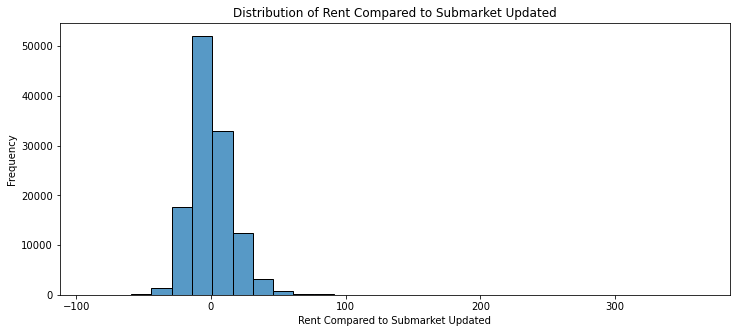

count   121081.000
mean         0.000
std         16.081
min        -89.396
10%        -17.190
25%        -10.513
50%         -2.193
75%          8.336
85%         15.149
90%         20.230
max        362.485
Name: rent_compared_to_submarket_updated, dtype: float64


In [23]:
# Visualizing the newly created variable, Rent_Deal_Percent
min_value = data['rent_compared_to_submarket_updated'].min()
max_value = data['rent_compared_to_submarket_updated'].max()

plt.figure(figsize=(12, 5))
sns.histplot(data['rent_compared_to_submarket_updated'], kde=False, bins=30)
plt.title('Distribution of Rent Compared to Submarket Updated')
plt.xlabel('Rent Compared to Submarket Updated')
plt.ylabel('Frequency')
#plt.xticks(range(int(min_value), int(max_value) + 1, 20))  # Setting ticks at 25% increments
plt.show()
print(data['rent_compared_to_submarket_updated'].describe(percentiles=[.1, .25, .5, .75, .85, .9]))

The variable I derived, 'sub_asking_rent_derived', presents more logical figures compared to 'sub_asking_rent'. Its distribution, being normal and centered around 0, indicates that most tenants are paying rent close to the market rate, which is what we would typically expect.

Based on the distribution, the 25th and 75th percentiles suggest that a majority of renters are paying rent within the range of -10% to +10% compared to the average in their submarket. Utilizing this observation, I plan to categorize them into groups: those within this range will be labeled as 'pays at market price'. Renters paying less than -10% will be categorized as 'paying less than market price', and those paying more than +10% will fall under 'paying more than market price'.

In [24]:
# Function to categorize based on the rent compared to the market
def categorize_rent_comparison(value):
    if pd.isna(value):
        return None  # Retains NA values
    elif -10 <= value <= 10:
        return 'pays at market price'
    elif value < -10:
        return 'paying less than market price'
    else:
        return 'paying more than market price'

# Apply the function to create the new column
data['rent_market_comparison'] = data['rent_compared_to_submarket_updated'].apply(categorize_rent_comparison)

# Validation for new column
data[['Rent', 'County', 'SqFt', 'SqFt_Category', 'Beds', 'Beds_cat', 'sub_asking_rent_derived','rent_compared_to_submarket_updated', 'rent_market_comparison']].head()

,Rent,County,SqFt,SqFt_Category,Beds,Beds_cat,sub_asking_rent_derived,rent_compared_to_submarket_updated,rent_market_comparison
0,2134.000,Santa Clara,725,2,1,1,2548.821,-16.275,paying less than market price
1,2997.000,San Mateo,745,2,1,1,2845.547,5.322,pays at market price
2,2187.000,Orange,442,1,0,0,1876.983,16.517,paying more than market price
3,2527.000,NaN,825,3,1,1,NaN,NaN,None
4,NaN,Alameda,904,3,1,1,2738.896,NaN,None


### 3.3 High Level of Care to the Property

#### <u>Variables Used</u>: pet, primary_age_at_move_in, total_of_occupants, Beds

Even though specific data on maintenance requests or related costs for the company isn't available, I can still use existing variables as proxies to assess the likelihood of a property being well-maintained. Indicators such as whether a tenant has a pet, their age at the time of moving in, the number of people living in the unit, and the occupants-to-bed ratio can all offer insights into the level of care a property is likely receiving.

To create a proxy variable estimating the level of care a property receives from its tenants, I'll combine 'pet', 'primary_age_at_move_in', 'total_of_occupants', and 'Beds' into a single score or category. This score will reflect the potential care levels.

In this scoring system, I'm estimating how well tenants maintain their rental properties. Points are allocated based on several factors: younger tenants receive higher scores, indicating potential for less care, while scores for middle-aged tenants are lower, and older tenants fall in-between. The number of people living in a unit also affects the score, with more occupants leading to higher scores due to the likelihood of increased wear and tear. This system accounts for various occupancy scenarios, such as having more occupants than beds, an equal number, or fewer, each impacting wear and tear differently. Tenants with pets receive an additional point, assuming that pets contribute to wear. Finally, these points are averaged to form a 'care_proxy_score' for each tenant, where a higher score suggests a potential for lower care of the property.

In [25]:
# Checking on variable types
print(data['pet'].dtype)
print(data['primary_age_at_move_in'].dtype)
print(data['total_of_occupants'].dtype)
print(data['Beds'].dtype)

int64
float64
float64
int64


In [26]:
# Understanding nulls for the column
print(f"Number of missing values in 'pet' is {data['pet'].isna().sum()}")
print(f"Number of missing values in 'primary_age_at_move_in' is {data['primary_age_at_move_in'].isna().sum()}")
print(f"Number of missing values in 'total_of_occupants' is {data['total_of_occupants'].isna().sum()}")
print(f"Number of missing values in 'Beds' is {data['Beds'].isna().sum()}")

Number of missing values in 'pet' is 0
Number of missing values in 'primary_age_at_move_in' is 61854
Number of missing values in 'total_of_occupants' is 52691
Number of missing values in 'Beds' is 0


In [27]:
# Updated function to calculate care_proxy_score with consideration for missing values
def calculate_care_proxy_score(row):
    scores = []
    
    # Handle pet score
    if pd.notna(row['pet']):
        scores.append(row['pet'])
    
    # Handle age score
    if pd.notna(row['primary_age_at_move_in']):
        age = row['primary_age_at_move_in']
        if age < 25:
            scores.append(3)  # Assuming younger tenants might care less
        elif 25 <= age < 60:
            scores.append(1)  # Middle-aged tenants assumed to care more
        else:
            scores.append(2)  # Older tenants

    # Handle occupant score considering Beds
    if pd.notna(row['total_of_occupants']) and pd.notna(row['Beds']):
        beds = row['Beds']
        occupants = row['total_of_occupants']
        occupant_to_bed_ratio = occupants / beds if beds else 0
        max_occupants = data['total_of_occupants'].max()

        # Assuming a scoring logic for occupant to bed ratio
        if occupant_to_bed_ratio > 1:
            # More occupants than beds
            score = occupant_to_bed_ratio * 2  # Adjust this factor as needed
        elif occupant_to_bed_ratio == 1:
            # Equal number of occupants and beds, adjust score based on total occupants
            score = 1 + (occupants / max_occupants)  # max_occupants is the max in your dataset
        else:
            # Less occupants than beds
            score = 0.5  # Assuming this is less likely to cause wear and tear
        scores.append(score)

    # Calculate average score if at least two scores are present, else return None
    if len(scores) >= 2:
        return sum(scores) / len(scores)
    else:
        return None  # Return None if less than two scores are available

# Apply the function to create the care_proxy_score column
data['care_proxy_score'] = data.apply(calculate_care_proxy_score, axis=1)

In [28]:
# View the results
data[['pet', 'total_of_occupants', 'primary_age_at_move_in', 'care_proxy_score']].head(30)

,pet,total_of_occupants,primary_age_at_move_in,care_proxy_score
0,0,1.000,24.000,1.370
1,1,1.000,37.000,1.037
2,0,1.000,68.000,0.833
3,0,1.000,25.000,0.704
4,0,NaN,NaN,NaN
5,1,NaN,NaN,NaN
6,0,3.000,50.000,1.333
7,0,2.000,51.000,0.741
8,0,2.000,29.000,0.741
9,0,2.000,26.000,1.667


In [29]:
print(f"Number of missing values in 'care_proxy_score' is {data['care_proxy_score'].isna().sum()}")

Number of missing values in 'care_proxy_score' is 52691


It is important to note that this composite score is a simplification and might not capture the full complexity of how tenants treat a property. There is also the potential for bias since not all pet owners or younger tenants will necessarily treat a property poorly. Also worth noting that there is a chance that we might have to deal with the missing variables in our dataset at some point.

### 3.4 Rule Adherence

The dataset lacks a specific variable indicating the number of warnings a tenant received or any similar measure. There aren't any available variables that could effectively serve as a proxy for a tenant's rule adherence.

This gap presents an opportunity to either introduce such variables into the dataset or to initiate a process for collecting this kind of data going forward.

### 3.5 Low Concession Utilization

#### **<u>Variables Used</u>:** Concession

In [30]:
# Checking data type
data['Concession'].dtype

dtype('int64')

In [31]:
# Understanding nulls for the column
print(f"Number of missing values in 'Concession' is {data['Concession'].isna().sum()}")

Number of missing values in 'Concession' is 0


In [32]:
data['Concession'].head()

0      0
1      1
2      0
3    208
4      0
Name: Concession, dtype: int64

Just from a quick glance at the data, I've noticed that although some people don't receive any concessions (amounting to zero dollars), there's a curious case of people receiving exactly $1 in concessions. I'm hesitant to categorize such instances as genuine concessions. It appears more like an administrative error or a data entry issue rather than an actual financial concession.

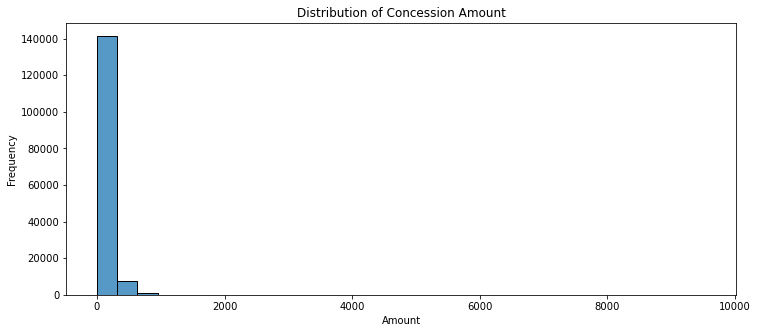

count   150000.000
mean        49.394
std        137.391
min         -2.000
10%          0.000
25%          0.000
50%          1.000
75%          1.000
85%        100.000
90%        200.000
95%        342.000
max       9545.000
Name: Concession, dtype: float64


In [33]:
#Checking distribution of the variable
plt.figure(figsize=(12, 5))
sns.histplot(data['Concession'], kde=False, bins=30)
plt.title('Distribution of Concession Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
print(data['Concession'].describe(percentiles=[.1, .25, .5, .75, .85, .9, .95]))

I notice outliers in the data, but I plan to re-examine the distribution, this time focusing on individuals who have received $350 or less in concessions, which represents the 95th percentile.

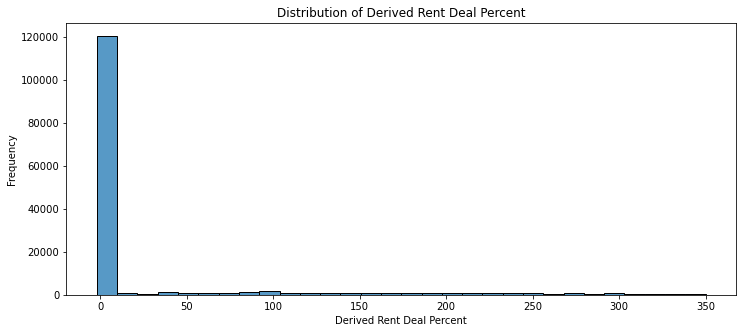

count   142833.000
mean        25.845
std         68.991
min         -2.000
10%          0.000
25%          0.000
50%          1.000
75%          1.000
85%         28.000
90%        108.000
max        350.000
Name: Concession, dtype: float64


In [34]:
# Checking distribution again, but for tenants with less than $350 in concessions
plt.figure(figsize=(12, 5))
sns.histplot(data[data['Concession'] <= 350]['Concession'], kde=False, bins=30)
plt.title('Distribution of Derived Rent Deal Percent')
plt.xlabel('Derived Rent Deal Percent')
plt.ylabel('Frequency')
plt.show()
print(data[data['Concession'] <= 350]['Concession'].describe(percentiles=[.1, .25, .5, .75, .85, .9]))

Most tenants apparently don't get a 'meaningful' concession, which is logical. I'm looking to create a variable that indicates whether a tenant has received a significant concession. I'll set $100 as the cutoff for a meaningful concession, a figure that aligns closely with the 90th percentile.

In [35]:
# Creating a variable showing who is receiving a significant concession
data['meaningful_concession_received'] = data['Concession'].apply(lambda x: 1 if x >= 100 else 0)

# Calculation validation
data[['Concession', 'meaningful_concession_received']].head()

,Concession,meaningful_concession_received
0,0,0
1,1,0
2,0,0
3,208,1
4,0,0


This variable is designed to identify tenants who are receiving concessions significant enough to potentially impact the company's profits. However, it's crucial to acknowledge that this method groups tenants receiving concessions of different amounts, such as 100 dollars and 350 dollars, together. This approach might not fully capture the varying degrees of financial impact these concessions have.

Ideally, I would compare the concession amount to the rent to gain a more nuanced understanding of its impact. But due to time constraints, the variable I've created will serve as a sufficient proxy for the time being. This approach provides an initial insight into how concessions might affect profitability, even if it doesn't fully delineate the scale of impact based on the concession amount.

### 3.6 High Income to Rent Ratio

#### **<u>Variables Used</u>:** yearly_adjusted_income, Rent, INDUSTRY, County

A high income-to-rent ratio is often a strong indicator of a valuable tenant, as it suggests a higher likelihood of timely rent payments and a reduced risk of missed payments.

To evaluate this, I can create a straightforward variable that calculates the income-to-rent ratio. By examining its distribution, I can categorize tenants into groups with high, average, or low income-to-rent ratios. This categorization will help in identifying tenants who are more financially stable and reliable in terms of rent payment.

In [36]:
# Checking data type
print(data['yearly_adjusted_income'].dtype)
print(data['Rent'].dtype)

float64
float64


In [37]:
# Understanding nulls for the column
print(f"Number of missing values in 'yearly_adjusted_income' is {data['yearly_adjusted_income'].isna().sum()}")
print(f"Number of missing values in 'Rent' is {data['Rent'].isna().sum()}")

Number of missing values in 'yearly_adjusted_income' is 73341
Number of missing values in 'Rent' is 1851


The dataset contains numerous missing values in the yearly_adjusted_income column. To tackle this, I can utilize the INDUSTRY variable, along with the County data. My strategy involves calculating the average income for each industry within each county, and then using these averages to fill in the missing income data. Although this method is relatively basic, it's a practical solution for handling the missing values. Implementing this approach could yield useful insights, providing a more complete picture of the income levels across different industries and counties in my dataset.

In [38]:
# Checking data type
print(data['INDUSTRY'].dtype)

object


In [39]:
print(f"Number of missing values in 'INDUSTRY' is {data['INDUSTRY'].isna().sum()}")

Number of missing values in 'INDUSTRY' is 18145


INDUSTRY has many missing values, but that number is much lower than how many yearly_adjusted_income contains

In [40]:
# Showing categories and their counts for INDUSTRY
data['INDUSTRY'].value_counts()

1_Unclassified                                                              31961
Professional, Scientific, and Technical Services                            17240
Information                                                                 14085
Manufacturing                                                               11383
Retail Trade                                                                 9645
Educational Services, Health Care and Social Assistance                      9261
Finance and Insurance                                                        5684
Public Administration                                                        5591
Accommodation and Food Services                                              4487
Health Care and Social Assistance                                            3934
Arts, Entertainment, and Recreation                                          3412
Other Services (except Public Administration)                                2648
Educational Serv

In [41]:
# Group by INDUSTRY and County and calculate the mean yearly_adjusted_income
average_income_by_industry_county = data.groupby(['INDUSTRY', 'County'])['yearly_adjusted_income'].mean()

In [42]:
# Function to impute missing income values
def impute_income(row):
    if pd.isna(row['yearly_adjusted_income']):
        return average_income_by_industry_county.get((row['INDUSTRY'], row['County']))
    else:
        return row['yearly_adjusted_income']

# Apply the function to the DataFrame
data['imputed_yearly_income'] = data.apply(impute_income, axis=1)

# Validation of the newly created variable
data[['INDUSTRY', 'County', 'yearly_adjusted_income', 'imputed_yearly_income']].head()

,INDUSTRY,County,yearly_adjusted_income,imputed_yearly_income
0,"Professional, Scientific, and Technical Services",Santa Clara,76799.000,76799.000
1,Information,San Mateo,84220.000,84220.000
2,Manufacturing,Orange,91203.000,91203.000
3,Finance and Insurance,NaN,180426.000,180426.000
4,"Professional, Scientific, and Technical Services",Alameda,NaN,138316.279


With the newly imputed values for yearly_adjusted_income available in the imputed_yearly_income variable, we're now ready to calculate the income-to-rent ratio.

In [43]:
# Create the income to rent ratio variable
# Note: Rent is monthly, so we multiply it by 12 to annualize it for comparison with yearly income
data['income_to_rent_ratio'] = data['imputed_yearly_income'] / (data['Rent'] * 12)

# Validation of the newly created variable
data[['INDUSTRY', 'County', 'yearly_adjusted_income', 'imputed_yearly_income', 'Rent', 'income_to_rent_ratio']].head()

,INDUSTRY,County,yearly_adjusted_income,imputed_yearly_income,Rent,income_to_rent_ratio
0,"Professional, Scientific, and Technical Services",Santa Clara,76799.000,76799.000,2134.000,2.999
1,Information,San Mateo,84220.000,84220.000,2997.000,2.342
2,Manufacturing,Orange,91203.000,91203.000,2187.000,3.475
3,Finance and Insurance,NaN,180426.000,180426.000,2527.000,5.950
4,"Professional, Scientific, and Technical Services",Alameda,NaN,138316.279,NaN,NaN


Let's visualize the income_to_rent_ratio to help us determine the correct thresholds for high, medium and low income to rent ratios.

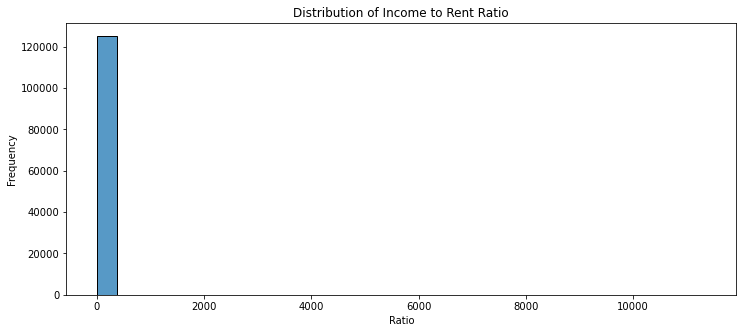

count   125218.000
mean         4.587
std         34.141
min         -0.101
10%          1.523
25%          2.541
50%          3.626
75%          4.934
85%          5.774
90%          6.474
95%          7.972
max      11348.499
Name: income_to_rent_ratio, dtype: float64


In [44]:
#Checking distribution of the variable
plt.figure(figsize=(12, 5))
sns.histplot(data['income_to_rent_ratio'], kde=False, bins=30)
plt.title('Distribution of Income to Rent Ratio')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()
print(data['income_to_rent_ratio'].describe(percentiles=[.1, .25, .5, .75, .85, .9, .95]))

Let's revisualize it with the 95% percentile of ~8 as the cutoff to exclude outliers

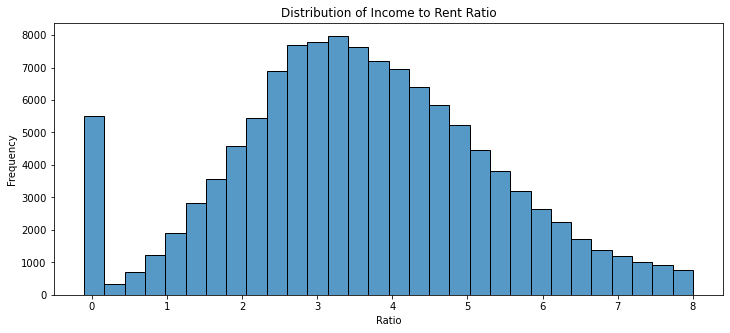

count   119027.000
mean         3.584
std          1.700
min         -0.101
10%          1.469
25%          2.483
50%          3.518
75%          4.700
85%          5.370
90%          5.838
max          7.999
Name: income_to_rent_ratio, dtype: float64


In [45]:
# Checking distribution again, but for ratios less than 8
plt.figure(figsize=(12, 5))
sns.histplot(data[data['income_to_rent_ratio'] <= 8]['income_to_rent_ratio'], kde=False, bins=30)
plt.title('Distribution of Income to Rent Ratio')
plt.xlabel('Ratio')
plt.ylabel('Frequency')
plt.show()
print(data[data['income_to_rent_ratio'] <= 8]['income_to_rent_ratio'].describe(percentiles=[.1, .25, .5, .75, .85, .9]))

The presence of zeros in the data indicates potential errors that warrant further investigation when time permits. However, given the current distribution, I can categorize tenants based on their income-to-rent ratio. Those falling between the 25th and 75th percentiles will be classified as 'medium'. Tenants above the 75th percentile will be deemed 'high', and those below the 25th percentile will be categorized as 'low'. This categorization helps in understanding different segments of tenants based on their financial stability in relation to their rent obligations.

In [46]:
# Calculate the 25th and 75th percentiles
percentile_25 = data['income_to_rent_ratio'].quantile(0.25)
percentile_75 = data['income_to_rent_ratio'].quantile(0.75)

# Function to categorize based on income_to_rent_ratio, preserving NAs
def categorize_ratio(ratio):
    if pd.isna(ratio):
        return None  # Preserve NA values
    elif ratio < percentile_25:
        return 'low'
    elif percentile_25 <= ratio <= percentile_75:
        return 'medium'
    else:
        return 'high'

# Apply the function to create the new variable
data['income_rent_category'] = data['income_to_rent_ratio'].apply(categorize_ratio)

In [47]:
# Validating the income_rent_category variable
data[['INDUSTRY', 'County', 'yearly_adjusted_income', 'imputed_yearly_income', 'Rent', 'income_to_rent_ratio', 'income_rent_category']].head()

,INDUSTRY,County,yearly_adjusted_income,imputed_yearly_income,Rent,income_to_rent_ratio,income_rent_category
0,"Professional, Scientific, and Technical Services",Santa Clara,76799.000,76799.000,2134.000,2.999,medium
1,Information,San Mateo,84220.000,84220.000,2997.000,2.342,low
2,Manufacturing,Orange,91203.000,91203.000,2187.000,3.475,medium
3,Finance and Insurance,NaN,180426.000,180426.000,2527.000,5.950,high
4,"Professional, Scientific, and Technical Services",Alameda,NaN,138316.279,NaN,NaN,None


The income-to-rent ratio category I've established seems quite robust. However, it's important to acknowledge that a significant portion of the income data was imputed using the average income per industry by county. Although this method offers a useful proxy, it may not accurately capture the precise financial circumstances of each tenant. This approach, while practical, should be considered as an approximation rather than a definitive representation of individual tenant incomes.

### 3.7 High Property Safety Index Choice

#### **<u>Variables Used</u>:** property_safety_index

We have a valuable variable in our dataset named 'property_safety_index', which provides the exact information we need. I will analyze its distribution to determine what qualifies as a high property safety score. This analysis will enable me to categorize properties based on their safety levels, offering insights into the preferences of tenants regarding the safety of their living environments.

In [48]:
# Checking variable data type
print(data['property_safety_index'].dtype)

float64


In [49]:
# Understanding nulls for the column
print(f"Number of missing values in 'property_safety_index' is {data['property_safety_index'].isna().sum()}")

Number of missing values in 'property_safety_index' is 27682


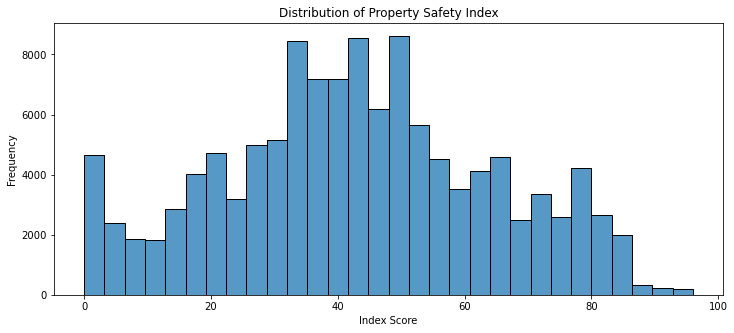

count   122318.000
mean        42.937
std         21.183
min          0.000
10%         14.000
25%         29.000
40%         37.000
50%         42.000
75%         57.000
80%         62.000
85%         67.000
90%         73.000
95%         79.000
max         96.000
Name: property_safety_index, dtype: float64


In [50]:
#Checking distribution of the variable
plt.figure(figsize=(12, 5))
sns.histplot(data['property_safety_index'], kde=False, bins=30)
plt.title('Distribution of Property Safety Index')
plt.xlabel('Index Score')
plt.ylabel('Frequency')
plt.show()
print(data['property_safety_index'].describe(percentiles=[.1, .25, .4, .5, .75, .8, .85, .9, .95]))#

The distribution of the property safety index in my dataset is in line with my expectations, showing an average around 43. It's surprising to note that only 15% of the apartments, those at the 85th percentile, score above 67 on a scale of 100. Given that such scores are relatively rare, these properties are likely in high demand.

Based on this distribution, I will categorize the safety scores as follows: scores below the 40th percentile will be classified as low, those between the 40th and 80th percentiles as medium, and any scores above the 80th percentile as high.

I acknowledge that for most variables, I've been setting thresholds with below the 25th percentile as low, between the 25th and 75th percentiles as medium, and above the 75th percentile as high. However, I've decided against using these standard cutoffs for the property safety index. To me, it seemed illogical to classify an apartment with a property score of 58 as 'high', as this doesn't align with my perception of what constitutes a high safety score. Therefore, I've adjusted the thresholds to better reflect the reality of the property safety index within my dataset.

In [52]:
# Calculate the 40th and 80th percentiles
percentile_40 = data['property_safety_index'].quantile(0.40)
percentile_80 = data['property_safety_index'].quantile(0.80)

# Function to categorize based on property_safety_index, preserving NAs
def categorize_property_safety(index):
    if pd.isna(index):
        return None  # Preserve NA values
    elif index < percentile_40:
        return 'low'
    elif percentile_40 <= index <= percentile_80:
        return 'medium'
    else:
        return 'high'

# Apply the function to create the new categorical variable
data['property_safety_index_cat'] = data['property_safety_index'].apply(categorize_property_safety)

# Validating the variable
data[['property_safety_index', 'property_safety_index_cat']].head()

,property_safety_index,property_safety_index_cat
0,22.000,low
1,59.000,medium
2,46.000,medium
3,NaN,None
4,71.000,high


#### Freeing some memory by writing the variables to an excel file and loading it once more after clearing my Kernel:

In [54]:
# Writing the final dataset to an excel file to free up memory
data.to_excel('Essex_Data Science_Dataset_Transformed.xlsx', index=False, engine='openpyxl')

# Restarting Kernel

In [3]:
# Reading the excel file into memory
data = pd.read_excel('Essex_Data Science_Dataset_Transformed.xlsx')

## 4. Identifying A Valuable Tenant

### **<u>Summary of Section 4</u>**

In section 4, I started creating an index to help determine who my 'most valuable tenants' are, based on the variables I created. These variables serve as effective proxies for tenant behaviors that are critical to solving the problem at hand. This index is designed to systematically assess and score each tenant based on these key behaviors, allowing me to identify and understand the most valuable segments of my renter population.

The index I created effectively captured our 'most valuable tenants'. These tenants typically have a higher income-to-rent ratio, indicating they manage rent payments more easily and are less likely to miss payments. They generally maintain their apartments better, as indicated by lower care_proxy_scores. These tenants often pay rent close to market rates, are usually long-term tenants, live in properties with high safety index scores, and receive fewer concessions. Notably, their annual income is nearly twice that of other renters, and they tend to be older. These characteristics align perfectly with our definition of 'the most valuable tenants'.

### 4.1 Identifying A Valuable Tenant Using A Scoring System

In [92]:
data.head()

,TenantId,PropertyId,UnitId,MoveInDate,MoveOutDate,amenity_amount,LeaseTerm,Rent,Concession,SqFt,Beds,County,Region,year_built,closest_transit_stop_dist_mi,lead_source,Zip_from,Zip_to,City_from,City_to,State_from,State_to,sub_occupancy,sub_pct_concessions_offer,sub_asking_rent,sub_concession_asking_pct,pet,INDUSTRY,yearly_adjusted_income,primary_age_at_move_in,total_of_occupants,pct_unemployment,property_safety_index,median_home_price,tenure,resident_status,long_term_tenant,Rent_per_SqFt,rent_compared_to_submarket,SqFt_Category,Beds_cat,sub_asking_rent_derived,rent_compared_to_submarket_updated,rent_market_comparison,care_proxy_score,meaningful_concession_received,imputed_yearly_income,income_to_rent_ratio,income_rent_category,property_safety_index_cat
0,-,45,"2,951",2021-04-22,2021-06-15,335,12.000,2134.000,0,725,1,Santa Clara,Northern California,1974.000,2.252,Google,95129.000,95051.000,SAN JOSE,SANTA CLARA,CA,CA,0.978,0.184,2087.020,0.056,0,"Professional, Scientific, and Technical Services",76799.000,24.000,1.000,5.400,22.000,1407986.000,54,Past,0,2.943,2.251,2,1,2548.821,-16.275,paying less than market price,1.370,0,76799.000,2.999,medium,low
1,1,"5,078","52,705",2022-04-19,NaT,0,12.000,2997.000,1,745,1,San Mateo,Northern California,1987.000,2.946,NaN,94404.000,94404.000,SAN MATEO,SAN MATEO,CA,CA,0.982,0.002,1784.700,0.081,1,Information,84220.000,37.000,1.000,2.200,59.000,1753663.000,595,Current,0,4.023,67.927,2,1,2845.547,5.322,pays at market price,1.037,0,84220.000,2.342,low,medium
2,2,32,"23,651",2022-11-03,2023-05-05,205,6.000,2187.000,0,442,0,Orange,Southern California,1984.000,8.644,NaN,92663.000,92648.000,NEWPORT BEACH,HUNTINGTON BEACH,CA,CA,0.972,0.150,3290.310,0.056,0,Manufacturing,91203.000,68.000,1.000,3.000,46.000,1420344.000,183,Past,0,4.948,-33.532,1,0,1876.983,16.517,paying more than market price,0.833,0,91203.000,3.475,medium,medium
3,3,"8,606","80,077",2021-11-30,2022-11-29,505,12.000,2527.000,208,825,1,NaN,NaN,NaN,NaN,Property Website,98102.000,98109.000,SEATTLE,SEATTLE,WA,WA,NaN,NaN,NaN,NaN,0,Finance and Insurance,180426.000,25.000,1.000,NaN,NaN,NaN,364,Past,0,3.063,NaN,3,1,NaN,NaN,NaN,0.704,1,180426.000,5.950,high,NaN
4,4,"5,620","75,013",2019-05-31,2020-07-12,564,NaN,NaN,0,904,1,Alameda,Northern California,2008.000,5.585,NaN,94544.000,94588.000,HAYWARD,PLEASANTON,CA,CA,0.950,0.432,2870.000,0.025,0,"Professional, Scientific, and Technical Services",NaN,NaN,NaN,2.600,71.000,1048554.000,408,Past,0,NaN,NaN,3,1,2738.896,NaN,NaN,NaN,0,138316.279,NaN,NaN,high


#### 4.1.1 Adjusting tenure categories

Before finalizing the index, I need to make some last modifications, especially concerning the 'tenure' variable, to accommodate current tenants fairly. I want to ensure that current tenants are not scored disadvantageously based on their tenure, particularly those who are new or whose duration of stay is yet to be determined. To address this, I will categorize past tenants using their tenure distribution. However, for current tenants, I will label them as either 'current' or 'current longterm'. In the scoring system for the index, 'current' tenants will be given a score of 2, while 'current longterm' tenants will receive a score of 3. Past tenants' scores will be determined based on their specific distribution criteria.

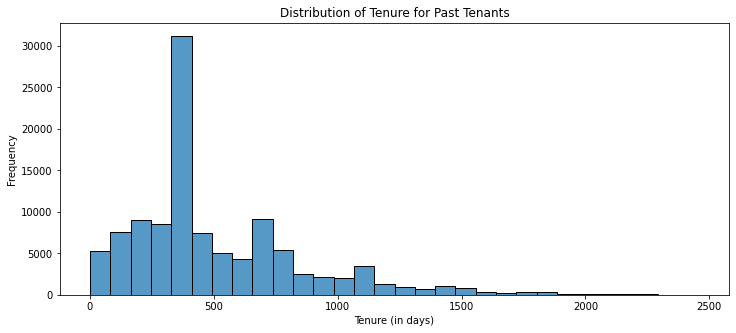

count   109770.000
mean       511.224
std        358.260
min          1.000
10%        145.000
25%        302.000
50%        389.000
75%        719.000
85%        827.000
90%       1033.000
max       2458.000
Name: tenure, dtype: float64


In [93]:
# Filter data to include only past tenants
past_tenants_data = data[data['resident_status'] == 'Past']

# Visualize the distribution of tenure for past tenants
plt.figure(figsize=(12, 5))
sns.histplot(past_tenants_data['tenure'], kde=False, bins=30)
plt.title('Distribution of Tenure for Past Tenants')
plt.xlabel('Tenure (in days)')
plt.ylabel('Frequency')
plt.show()

# Print descriptive statistics for tenure of past tenants
print(past_tenants_data['tenure'].describe(percentiles=[.1, .25, .5, .75, .85, .9]))

In my dataset, I'm going to introduce a new variable called 'tenure_category'. This will classify tenants based on their 'resident_status' and the length of their 'tenure' in days. For those with 'resident_status' as 'Past', 'tenure_category' will be labeled 'low' for tenures of 365 days or fewer, 'medium' for tenures between 365 and 730 days, and 'high' for those with tenures over 730 days. Conversely, for 'current' tenants, those with a tenure under 730 days will be categorized as '2', while those with more than 730 days will be marked as '3'. This categorization will yield five distinct groups in 'tenure_category': low, medium, high, current, and current longterm.

***The rationale behind this scoring approach for current tenants is to acknowledge that those who have been with us for over 730 days, or two years, meet the long-term threshold as per historical data. Those current tenants who haven't yet reached this milestone are still in the running to become long-term tenants. Therefore, I don't want to assign them a low score in the index that might unfairly penalize them. Instead, they will receive a score of 2, rather than a 1, to reflect their potential to become long-term tenants without negatively impacting their current standing.***

In [137]:
def categorize_tenure(row):
    if row['resident_status'] == 'Current':
        if row['tenure'] < 730:
            return 'current'
        else:
            return 'current Longterm'
    else:  # For 'Past' tenants
        if row['tenure'] <= 365:
            return 'low'
        elif 365 < row['tenure'] <= 730:
            return 'medium'
        else:
            return 'high'

# Apply the function to create 'tenure_category' column
data['tenure_category'] = data.apply(categorize_tenure, axis=1)

In [138]:
# Validating results
data[['tenure', 'resident_status', 'tenure_category']].head(10)

,tenure,resident_status,tenure_category
0,54,Past,low
1,595,Current,current
2,183,Past,low
3,364,Past,low
4,408,Past,medium
5,122,Past,low
6,980,Current,current Longterm
7,115,Current,current
8,1399,Past,high
9,864,Past,high


#### 4.1.2 Creating categorical variable for care_proxy_score

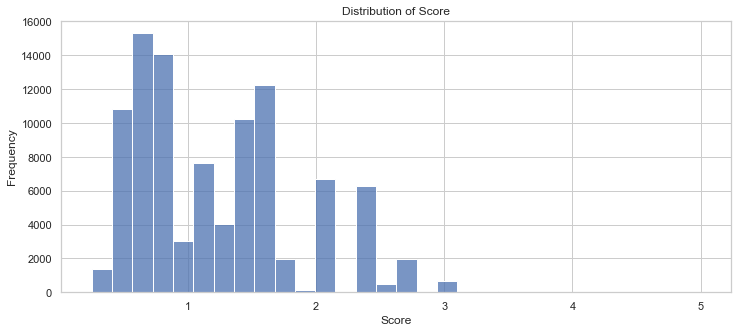

count   97309.000
mean        1.233
std         0.622
min         0.250
10%         0.500
25%         0.704
50%         1.074
75%         1.667
85%         2.000
90%         2.000
max         5.000
Name: care_proxy_score, dtype: float64


In [139]:
# Visualizing the distribution of care_proxy_score
plt.figure(figsize=(12, 5))
sns.histplot(data['care_proxy_score'], kde=False, bins=30)
plt.title('Distribution of Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

print(data['care_proxy_score'].describe(percentiles=[.1, .25, .5, .75, .85, .9]))

I'll be categorizing the 'care_proxy_score' variable into 'low', 'medium', and 'high' categories based on its distribution, and this will be reflected in a new column titled 'care_proxy_score_cat'. Scores below 0.704 will be labeled as 'high', indicating a higher level of care for the property, while scores ranging from 0.704 to 1.667 will be classified as 'medium'. Scores above 1.667 will be categorized as 'low', suggesting lesser care for the property. ***It's important to note that in this context, lower scores signify better care. Additionally, any NA values in 'care_proxy_score' will remain as NAs in the 'care_proxy_score_cat' column.***

In [140]:
def categorize_care_proxy_score(score):
    if pd.isna(score):
        return np.nan  # Keep NA values as NA
    elif score < 0.704:
        return 'high'
    elif 0.704 <= score <= 1.667:
        return 'medium'
    else:  # score > 1.667
        return 'low'

# Apply the function to create 'care_proxy_score_cat' column
data['care_proxy_score_cat'] = data['care_proxy_score'].apply(categorize_care_proxy_score)

In [141]:
# Validating results
data[['care_proxy_score', 'care_proxy_score_cat']].head()

,care_proxy_score,care_proxy_score_cat
0,1.370,medium
1,1.037,medium
2,0.833,medium
3,0.704,high
4,NaN,NaN


#### 4.1.3 Creating the Index

In [142]:
data[['care_proxy_score_cat', 'tenure_category', 'property_safety_index_cat', 
      'income_rent_category', 'meaningful_concession_received', 'rent_market_comparison']].head()

,care_proxy_score_cat,tenure_category,property_safety_index_cat,income_rent_category,meaningful_concession_received,rent_market_comparison
0,medium,low,low,medium,0,paying less than market price
1,medium,current,medium,low,0,pays at market price
2,medium,low,medium,medium,0,paying more than market price
3,high,low,NaN,high,1,NaN
4,NaN,medium,high,NaN,0,NaN


I will create a new column in the dataset named 'valuable_tenant_index'. This column will be a composite score, aggregating six variables: 'care_proxy_score_cat', 'tenure_category', 'property_safety_index_cat', 'income_rent_category', 'meaningful_concession_received', and 'rent_market_comparison'. For most of these variables, categorized into high, medium, and low, I'll assign scores of 3, 2, and 1, respectively. However, 'meaningful_concession_received' will be scored differently, with a '1' being scored as 1 and a '0' as 2. Any missing values across these variables will also be scored as 1.

Additionally, the 'tenure_category' includes a 'current' category, which I'll score as 2. It also includes a 'current long-term' category, which I'll score as 3. The 'valuable_tenant_index' will sum these scores, giving a comprehensive index for each tenant, allowing for a nuanced assessment of their value based on these combined factors.

In [148]:
def calculate_valuable_tenant_index(row):
    # Initialize the index to 0
    index = 0
    
    # For each variable except 'meaningful_concession_received', add points based on category
    for var in ['care_proxy_score_cat', 'property_safety_index_cat', 
                'income_rent_category', 'rent_market_comparison']:
        if pd.isna(row[var]):
            index += 1  # Missing variables considered as 1
        elif row[var] == 'high':
            index += 3
        elif row[var] == 'medium':
            index += 2
        else:  # Low or any other category
            index += 1

    # Special handling for 'tenure_category' with additional 'current longterm' category
    if pd.isna(row['tenure_category']):
        index += 1
    elif row['tenure_category'] == 'high' or row['tenure_category'] == 'current Longterm':
        index += 3
    elif row['tenure_category'] == 'medium' or row['tenure_category'] == 'current':
        index += 2
    else:  # Low
        index += 1

    # Special handling for 'meaningful_concession_received'
    if pd.isna(row['meaningful_concession_received']):
        index += 1  # Missing variables considered as 1
    elif row['meaningful_concession_received'] == 1:
        index += 1
    else:  # 0 or any other value
        index += 2

    return index

# Apply the function to create 'valuable_tenant_index' column
data['valuable_tenant_index'] = data.apply(calculate_valuable_tenant_index, axis=1)

In [149]:
data[['care_proxy_score_cat', 'tenure_category', 'property_safety_index_cat', 
      'income_rent_category', 'meaningful_concession_received', 'rent_market_comparison',
      'valuable_tenant_index']].head()

,care_proxy_score_cat,tenure_category,property_safety_index_cat,income_rent_category,meaningful_concession_received,rent_market_comparison,valuable_tenant_index
0,medium,low,low,medium,0,paying less than market price,9
1,medium,current,medium,low,0,pays at market price,10
2,medium,low,medium,medium,0,paying more than market price,10
3,high,low,NaN,high,1,NaN,10
4,NaN,medium,high,NaN,0,NaN,10


#### 4.1.4 Analyzing the Index

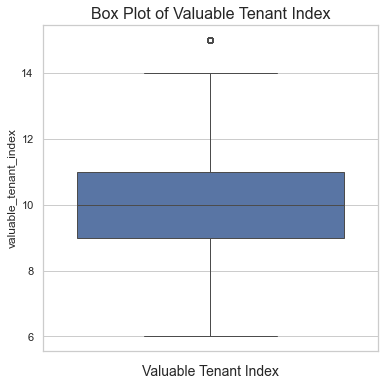

count   150000.000
mean         9.980
std          1.571
min          6.000
10%          8.000
25%          9.000
50%         10.000
75%         11.000
90%         12.000
max         15.000
Name: valuable_tenant_index, dtype: float64


In [150]:
# Visualizing the distribution of the index
# Set the size of the plot
plt.figure(figsize=(6, 6))  # Adjust the size as per your requirements

# Create the box plot with an aesthetically pleasing style
sns.set(style="whitegrid")  # This sets a background grid for better readability
box_plot = sns.boxplot(data['valuable_tenant_index'])

# Enhance title and labels with larger, more readable fonts
plt.title('Box Plot of Valuable Tenant Index', fontsize=16)
plt.xlabel('Valuable Tenant Index', fontsize=14)

# Show the plot
plt.show()

print(data['valuable_tenant_index'].describe(percentiles=[.1, .25, .5, .75, .9]))

Based on the visualization, I have decided to set a cutoff score of 12 for identifying our most valuable tenants, aligning this threshold with the 90th percentile. Therefore, tenants scoring 12 or higher on the index will be classified as our most valuable tenants.

I will create a new variable named 'valuable_tenant' derived from the 'valuable_tenant_index'. In this new variable, tenants with a score of 12 or higher on the 'valuable_tenant_index' will be classified as '1', indicating they are considered valuable tenants. Those with scores below 12 will be assigned a '0', signifying they are not regarded as valuable tenants. This categorization will provide a clear and quantifiable method to distinguish between valuable and other tenants based on the established criteria.

In [151]:
# Create 'valuable_tenant' based on 'valuable_tenant_index'
data['valuable_tenant'] = data['valuable_tenant_index'].apply(lambda x: 1 if x >= 12 else 0)

# Validating 
data[['valuable_tenant_index', 'valuable_tenant']].head(10)

,valuable_tenant_index,valuable_tenant
0,9,0
1,10,0
2,10,0
3,10,0
4,10,0
5,9,0
6,12,1
7,12,1
8,11,0
9,12,1


Let's see how valuable tenants stack up againt the rest

In [183]:
variables = ['income_to_rent_ratio', 'care_proxy_score', 'rent_compared_to_submarket_updated', 
             'tenure', 'property_safety_index', 'Rent', 'Concession',
             'yearly_adjusted_income', 'primary_age_at_move_in']
num_cats = 2

for i in range(num_cats):
    cluster_data = data[data['valuable_tenant'] == i]
    means = cluster_data[variables].mean()
    print(f'Valuable Tenant Category {i} Means:')
    for variable, mean in means.items():
        print(f'{variable}: {mean:.2f}')
    print('\n')

Valuable Tenant Category 0 Means:
income_to_rent_ratio: 4.02
care_proxy_score: 1.32
rent_compared_to_submarket_updated: 0.73
tenure: 484.80
property_safety_index: 40.20
Rent: 2467.63
Concession: 55.00
yearly_adjusted_income: 105348.42
primary_age_at_move_in: 30.80


Valuable Tenant Category 1 Means:
income_to_rent_ratio: 6.97
care_proxy_score: 0.94
rent_compared_to_submarket_updated: -3.07
tenure: 942.11
property_safety_index: 54.54
Rent: 2289.91
Concession: 21.03
yearly_adjusted_income: 213309.85
primary_age_at_move_in: 35.44




In [181]:
data['valuable_tenant'].value_counts()

valuable_tenant
0    125258
1     24742
Name: count, dtype: int64

Running t-tests to test for statstical significance in the differences between both groups for each variable

In [182]:
variables = ['income_to_rent_ratio', 'care_proxy_score', 'rent_compared_to_submarket_updated', 
             'tenure', 'property_safety_index', 'Rent', 'Concession',
             'yearly_adjusted_income', 'primary_age_at_move_in']
num_cats = 2

for variable in variables:
    print(f'\nVariable: {variable}')
    
    # Splitting the data into two groups
    group1 = data[data['valuable_tenant'] == 0][variable]
    group2 = data[data['valuable_tenant'] == 1][variable]
    
    # Calculating means
    mean1, mean2 = group1.mean(), group2.mean()
    print(f'Group 0 Mean: {mean1:.2f}')
    print(f'Group 1 Mean: {mean2:.2f}')
    
    # Performing t-test
    t_stat, p_value = ttest_ind(group1.dropna(), group2.dropna(), equal_var=False)  # equal_var=False for Welch's t-test
    print(f'p-value: {p_value:.4f}')


Variable: income_to_rent_ratio
Group 0 Mean: 4.02
Group 1 Mean: 6.97
p-value: 0.0000

Variable: care_proxy_score
Group 0 Mean: 1.32
Group 1 Mean: 0.94
p-value: 0.0000

Variable: rent_compared_to_submarket_updated
Group 0 Mean: 0.73
Group 1 Mean: -3.07
p-value: 0.0000

Variable: tenure
Group 0 Mean: 484.80
Group 1 Mean: 942.11
p-value: 0.0000

Variable: property_safety_index
Group 0 Mean: 40.20
Group 1 Mean: 54.54
p-value: 0.0000

Variable: Rent
Group 0 Mean: 2467.63
Group 1 Mean: 2289.91
p-value: 0.0000

Variable: Concession
Group 0 Mean: 55.00
Group 1 Mean: 21.03
p-value: 0.0000

Variable: yearly_adjusted_income
Group 0 Mean: 105348.42
Group 1 Mean: 213309.85
p-value: 0.0000

Variable: primary_age_at_move_in
Group 0 Mean: 30.80
Group 1 Mean: 35.44
p-value: 0.0000


As observed, there is a distinct difference between our most valuable tenants and all others. Most valuable tenants exhibit behaviors that are significantly more favorable for us as landlords or a property management company. These behaviors positively impact our bottom line, which is precisely what any property owner would consider when defining valuable tenants. They demonstrate qualities and actions that align with our interests, leading to more stable and profitable property management. This distinction underscores the importance of accurately identifying and understanding the traits that contribute to a tenant's value.

# 
---